# Math 151B Final Exam Programming Portion

- Brandon Loptman
- UID: 604105043
- March 16, 2020

In [229]:
#importing some useful libraries
#these libraries are all included in a standard installation of Anaconda

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
plt.style.use("ggplot")

## 3.)

**(a.)**

We are tasked with solving a third order ODE, but the methods are have learned about are only designed to solve first order ODEs. Thus, in order to solve this ODE we will need to convert the single third order equation into three first order equations. We can accomplish this with the following substitutions:

\begin{equation}
u_{1}(t) = y(t) \\
u_{2}(t) = y'(t) \\
u_{3}(t) = y''(t)
\end{equation}

Then, taking a time derivative of each we have:

\begin{equation}
u_{1}'(t) = y'(t) = u_{2}(t) \\
u_{2}'(t) = y''(t) = u_{3}(t)\\
u_{3}'(t) = y'''(t) = 4y + 4y' - y'' = 4u_{1}(t) + 4u_{2}(t) - u_{3}(t)
\end{equation}

Now, we have a system of three first order ODEs,each of which can be solved individually using the methods we have studied.

In [230]:
def f(t,u):
    """
    System of ODEs represented as a Numpy array for use in the EulerSystem and RK4System.
    """
    return np.array([u[1],u[2],4*u[0]+4*u[1]-u[2]])

def Y_exact(t):
    """
    Exact solution to the given ODE.
    """
    return np.exp(-t) + np.exp(2*t) + np.exp(-2*t)

d = 3 #dimension of our system
t0 = 0
y0 = np.array([3,-1,9])
h = .2
N = 10

In [231]:
def EulerSystem(f,d,t0,y0,h,N):
    """
    Implements Euler's Method for a ODE system of dimension d.
    """    
    T = np.array([t0 + n * h for n in range(N + 1)])
    Y = np.zeros((N+1,d))

    Y[0] = y0
    
    for n in range(N):
        Y[n+1] =  Y[n] + h * f(T[n], Y[n])
    
    return T,Y

In the output to the following cell each column represents the solution to $u_{1}(t)$, $u_{2}(t)$, $u_{3}(t)$, respectively. Since $u_{1}(t) = y(t)$, it is the solution to the inital third order ODE it is the only solution we care about.

In [232]:
T,Y_Euler = EulerSystem(f,d,t0,y0,h,N)
print(Y_Euler)

[[  3.          -1.           9.        ]
 [  2.8          0.8          8.8       ]
 [  2.96         2.56         9.92      ]
 [  3.472        4.544       12.352     ]
 [  4.3808       7.0144      16.2944    ]
 [  5.78368     10.27328     22.15168   ]
 [  7.838336    14.703616    30.566912  ]
 [ 10.7790592   20.8169984   42.4870912 ]
 [ 14.94245888  29.31441664  59.26651904]
 [ 20.80534221  41.16772045  82.81871565]
 [ 29.0388863   57.73146358 115.83342264]]


In [233]:
print("T values: \n", T)
print("\n")
print("Exact Y values: \n", Y_exact(T))
print("\n")
print("Approximate Y values: \n", Y_Euler[:,0]) #slicing the array to only print the first column

T values: 
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


Exact Y values: 
 [ 3.          2.9808755   3.34518994  4.17012277  5.60425791  7.89227082
 11.41508855 16.7520538  24.77518892 36.79085705 54.75180096]


Approximate Y values: 
 [ 3.          2.8         2.96        3.472       4.3808      5.78368
  7.838336   10.7790592  14.94245888 20.80534221 29.0388863 ]


**(b.)**

In [235]:
def RK4System(f,d,t0,y0,h,N):
    """
    Implements RK4 for a ODE system of dimension d.
    """
    T = np.array([t0 + n * h for n in range(N + 1)])
    Y = np.zeros((N+1,d))
    
    Y[0] = y0
    
    for n in range(N):
        k1 = h*f(T[n],Y[n])
        k2 = h*f(T[n]+0.5*h,Y[n]+0.5*k1)
        k3 = h*f(T[n]+0.5*h,Y[n]+0.5*k2)
        k4 = h*f(T[n+1],Y[n]+k3)

        Y[n+1] = Y[n] + (1/6)*(k1+ 2*k2 + 2*k3 + k4)
        
    return T,Y

In [236]:
T,Y_RK4 = RK4System(f,d,t0,y0,h,N)
print(Y_RK4)

[[  3.          -1.           9.        ]
 [  2.98086667   0.82393333   9.46726667]
 [  3.34502877   2.88134008  11.36914226]
 [  4.16962578   5.48759308  15.03205265]
 [  5.60314667   9.050318    21.06458278]
 [  7.89009498  14.13487018  30.45672419]
 [ 11.41110923  21.55548715  44.74083719]
 [ 16.74506145  32.50687227  66.24043859]
 [ 24.76321587  48.75752245  98.44715865]
 [ 36.77072345  72.9361239  146.58698307]
 [ 54.71839857 108.9574285  218.46757563]]


In [237]:
print("T values: \n", T)
print("\n")
print("Exact Y values: \n", Y_exact(T))
print("\n")
print("Approximate Y values: \n", Y_RK4[:,0])

T values: 
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


Exact Y values: 
 [ 3.          2.9808755   3.34518994  4.17012277  5.60425791  7.89227082
 11.41508855 16.7520538  24.77518892 36.79085705 54.75180096]


Approximate Y values: 
 [ 3.          2.98086667  3.34502877  4.16962578  5.60314667  7.89009498
 11.41110923 16.74506145 24.76321587 36.77072345 54.71839857]


**(c.)**

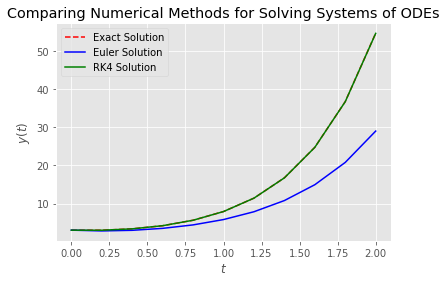

In [238]:
plt.plot(T,Y_exact(T),label="Exact Solution",linestyle="--",color="red")
plt.plot(T,Y_Euler[:,0],label="Euler Solution",color="blue")
plt.plot(T,Y_RK4[:,0],label="RK4 Solution",color="green")

plt.title("Comparing Numerical Methods for Solving Systems of ODEs")
plt.ylabel("$y(t)$")
plt.xlabel("$t$")

plt.legend()
plt.show()

The RK4 solution is somewhat hard to see since it very nearly overlaps the exact solution. The Euler's Method solution agrees farily well for small $t$ values, but quickly begins to deviate from the true solution.

## 4.)

**(a.)**

In [239]:
A = np.array([[4,1,-1,0],[1,3,-1,0],[-1,-1,5,2],[0,0,2,4]])
#print(A)

evals = np.linalg.eigvals(A)
domEval = np.max(evals)

print("The dominant eigenvalue is ", domEval)

The dominant eigenvalue is  7.086130197651494


**(b.)**

In [240]:
def PowerMethod(A,x,n,tol=1e-4, N=25):
    """
    Implements the Power Method as described by the algorithm in the textbook.
    """    
    k = 1
    
    xp = np.max(abs(x))
    x = x/xp
    
    eval_list = np.array([])
    
    while(k <= N):
        #print(k)
        y = A.dot(x)
        
        yp = np.max(np.abs(y))
        u = yp
        
        eval_list = np.append(eval_list,u)
        #print(eval_list)
        
        #print(u)
        
        if(yp == 0):
            print("A has eigenvalue 0, select a new vector x and restart.")
            return x,eval_list
        
        err = np.max(np.abs(x-(y/yp)))
        
        x = y/yp
        #print(x)
        
        if(err < tol):
            print("The procedure was successful!")
            return u,x,eval_list
        
        k = k + 1
        
    print("The maximum number of iterations exceeded! The procedure was unsuccessful.")
    return u,x,eval_list

In [241]:
n = 4
N = 25
tol = 1e-4
x0 = np.array([0,1,0,0])

u,v,evals_P = PowerMethod(A,x0,n,tol,N)

N1 = evals_P.size
N1_vals = np.arange(N1)

print("The dominant eigenvalue is ", u)

The procedure was successful!
The dominant eigenvalue is  7.086214496245025


**(c.)**

In [242]:
def SymmetricPowerMethod(A,x,n,tol=1e-4, N=25):
    """
    Implements the Symmetric Power Method as described by the algorithm in the textbook.
    """    
    k = 1
    
    x = x/np.linalg.norm(x)
    
    eval_list = np.array([])
    
    while(k <= N):
        #print(k)
        y = A.dot(x)
        
        u = x.dot(y)
        
        eval_list = np.append(eval_list,u)
        #print(eval_list)
        
        #print(u)
        
        y_norm = np.linalg.norm(y)
        
        if(y_norm == 0):
            print("A has eigenvalue 0, select a new vector x and restart.")
            return x,eval_list
        
        err = np.linalg.norm(x - (y/y_norm))
        
        x = y/y_norm
        #print(x)
        
        if(err < tol):
            print("The procedure was successful!")
            return u,x,eval_list
        
        k = k + 1
        
    print("The maximum number of iterations exceeded! The procedure was unsuccessful.")
    return u,x,eval_list

In [18]:
u,v,evals_S = SymmetricPowerMethod(A,x0,n,tol,N)

N2 = evals_S.size
N2_vals = np.arange(N2)

print("The dominant eigenvalue is ", u)

The procedure was successful!
The dominant eigenvalue is  7.086130081621901


**(d.)**

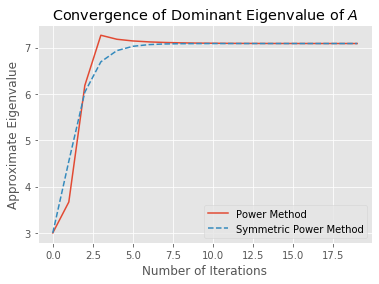

In [243]:
plt.plot(N1_vals,evals_P,label="Power Method")
plt.plot(N2_vals,evals_S,linestyle="--",label="Symmetric Power Method")

plt.title("Convergence of Dominant Eigenvalue of $A$")
plt.xlabel("Number of Iterations")
plt.ylabel("Approximate Eigenvalue")

plt.legend()
plt.show()

We can see from the plot that the Symmetric Power Method converges to the value of the domiant eigenvalue faster than the Power Method. Thus, the Symmetric Power Methods performs better. The Symmetric Power Method performs better than the regular Power Method because it has a faster rate of convergence. The rate of convergence of the Power Method is $O(|{\lambda_{2}/\lambda_{1}}|^{m})$ while the Symmetric Power Method's rate of convergence is $O(|{\lambda_{2}/\lambda_{1}}|^{2m})$, where $\lambda_{1}$ is the most dominant eigenvalue, $\lambda_{2}$ is the second most dominant eigenvalue, and m is the number of iterations.

## 5.)

In [244]:
#some helper functions needed for the methods

def F(f,x,n):
    """
    Evaluates an n dimensional array of functions f at a point x.
    """
    fx = np.zeros([n,1])
    
    for i in range(n):
        fx[i] = f[i](x)
    
    return fx

def J(j,x,n):
    """
    Evaluates an n x n matrix of functions j at a point x.
    """
    jx = np.zeros([n,n])
    
    for i in range(n):
        for k in range(n):
            jx[i,k] = j[i,k](x)
            
    return jx

def G(f):
    """
    Computes the function g(x) as defined in the book.
    """
    return np.sum(f**2)

def Grad(J,F):
    """
    Computes the gradient of g(x) using the Jacobian and F.
    """
    n = F.shape[0]
    g = 2*np.matmul(np.transpose(J),F)
    return np.reshape(g,n)

**(a.)**

In [267]:
def f1(x):
    return (x[0]**3) + (x[0]**2)*x[1] - (x[0]*x[2]) + 6
def f2(x):
    return np.exp(x[0]) + np.exp(x[1]) - x[2]
def f3(x):
    return (x[1]**2) - (2*x[0]*x[2]) - 4

def j11(x):
    return (3*(x[0]**2)) + (2*x[0]*x[1]) - x[2]
def j12(x):
    return x[0]**2
def j13(x):
    return -1*x[0]
def j21(x):
    return np.exp(x[0])
def j22(x):
    return np.exp(x[1])
def j23(x):
    return -1
def j31(x):
    return -2*x[2]
def j32(x):
    return 2*x[1]
def j33(x):
    return -2*x[0]

f = np.array([f1,f2,f3])
j = np.array([[j11,j12,j13],[j21,j22,j23],[j31,j32,j33]])
x0 = np.array([1,1,1])

n = 3
tol = 1e-5
N = 100

In [268]:
def SteepestDescent(n,x0,tol=1e-5,N=100):
    """
    Implements the Gradient Descent Algorithm according to the algorithm in the book.
    """
    k = 1
    x = x0
    
    x_list = np.array([x])
    
    while(k <= N):
        #print(k)
        
        g1 = G(F(f,x,n))
        #print("g1 = ", g1)
        
        z = Grad(J(j,x,n),F(f,x,n))

        z0 = np.linalg.norm(z)

        if(z0 == 0):
            print("Zero gradient!")
            return x,x_list
        
        z = z/z0
        #print("z = ", z)
        
        a1 = 0
        a3 = 1
        
        g3 = G(F(f,x-a3*z,n))
        #print("g3 = ", g3)
        
        while(g3 >= g1):
            a3 = 0.5*a3
            g3 = G(F(f,x-a3*z,n))
            
            if(a3 < tol/2):
                print("No likely imporvement...")
                return x,x_list
            
        a2 = 0.5*a3
        
        g2 = G(F(f,x-a2*z,n))
        #print("g2 = ", g2)

        
        h1 = (g2-g1)/a2
        h2 = (g3-g2)/(a3-a2)
        h3 = (h2-h1)/a3
        
        #print("h1 = ", h1)
        #print("h2 = ", h2)
        #print("h3 = ", h3)

        
        a0 = 0.5*(a2-h1/h3)
        g0 = G(F(f,x-a0*z,n))
        
        #print("a0 = ", a0)
        #print("g0 = ", g0)
        
        if(g0 <= g3):
            a = a0
            g = g0
        else:
            a = a3
            g = g3
        
        x = x -a*z
        x_list = np.append(x_list,[x],axis=0)
        
        if(np.abs(g-g1) < tol):
            print("The procedure was successful!")
            return x,x_list
        
        k = k+1
        
    print("Maximum number of iterations exceeded!")
    return x,x_list

In [269]:
x_SD, xvals_SD = SteepestDescent(n,x0,tol,N)
print("\n")
print("The approximate solution to the system of equations is: \n","x = ", x_SD)

Maximum number of iterations exceeded!


The approximate solution to the system of equations is: 
 x =  [0.11304678 1.72239338 5.34323746]


In [270]:
#checking how well the approximate solution works
sol_SD = F(f,x_SD,n)
print("F(x_SD) = ", sol_SD.flatten())

F(x_SD) =  [ 5.41942035  1.37435725 -2.24143262]


**(b.)**

In [271]:
def Newton_Method_Systems(n,x0,tol=1e-5,N=100):
    k = 1
    x = x0
    
    x_list = np.array([x])
    
    while(k <= N):
        #print("iteration ", k)
        
        fx = F(f,x,n)
        jx = J(j,x,n)
        
        #print("J(x) = \n", jx)
        #print("F(x) = \n", fx)
        
        #jx_inv = np.linalg.inv(jx)
        
        #print("F(x) = \n", fx)
        #print("J(x) = \n", jx)
        #print("J(x) Inverse = \n", jx_inv)

        
        y = -1*np.linalg.solve(jx,fx)
        y = y.reshape(n)
        
        x = x + y 
        
        x_list = np.append(x_list,[x],axis=0)
        
        #print("y = ", y)
        #print("x = ", x)
        
        if(np.linalg.norm(y) < tol):
            print("The procedure was successful!")
            return x,x_list
        
        k = k + 1
        
    print("Max number of iterations surpassed. The procedure was unsuccessful!")
    return x,x_list

In [272]:
x_NM,xvals_NM = Newton_Method_Systems(n,x0,tol,N)
print("\n")
print("The approximate solution to the system of equations is: \n","x = ", x_NM)

The procedure was successful!


The approximate solution to the system of equations is: 
 x =  [-1.95629521 -0.131796    1.01790103]


In [273]:
#checking how well the approximate solution works
sol_NM = F(f,x_NM,n)
print("F(x_NM) = ", sol_NM.flatten())

F(x_NM) =  [-1.54197544e-10  1.04558584e-11 -1.76871850e-11]


**(c.)**

In [274]:
def BroydenMethod(n, x0, tol = 1e-5, N = 100):
    """
    Implements Broyden's Method according to the algorithm in the book.
    """
    x = x0.reshape((n,1))
    x_list = np.array([x.flatten()])
    
    A0 = J(j,x,n)
    v = F(f,x,n)
    
    A = np.linalg.inv(A0)
    
    s = -1*np.matmul(A,v)
    x = x + s
    k = 2
    
    while(k <= N):
        w = v
        v = F(f,x,n)
        y = v - w
        
        z = -1*np.matmul(A,y)
        
        p = -1*np.matmul(np.transpose(s),z)
        
        ut = np.matmul(np.transpose(s),A)
        
        A = A + (1/p)*np.matmul((s+z),ut)
        
        s = -1*np.matmul(A,v)
        x = x + s
        
        x_list = np.append(x_list,[x.flatten()],axis=0)
        
        if(np.linalg.norm(s) < tol):
            print("The procedure was successful!")
            return x.flatten(),x_list
        
        k = k + 1
    
    print("Maximum number of iterations exceeded!")
    return x.flatten(),x_list

In [254]:
x_BM,xvals_BM = BroydenMethod(n,x0,tol,N)
print("\n")
print("The approximate solution to the system of equations is: \n","x = ", x_BM)

The procedure was successful!


The approximate solution to the system of equations is: 
 x =  [ 0.13092145  4.01764002 46.36890756]


In [275]:
#checking how well the approximate solution works
sol_BM = F(f,x_BM,n)
print("F(x_BM) = ", sol_BM.flatten())

F(x_BM) =  [4.23594068e-04 1.03407781e+01 6.23107161e-05]


**(d.)**

In the following section we examine the convergence for each method for solving the nonlinear system of equations. In the plots each line represents a component within the approximate solution found using the respective method.

In [276]:
#getting the number of iterations for each method
N_NM = np.shape(xvals_NM)[0]
N_BM = np.shape(xvals_BM)[0]
N_SD = np.shape(xvals_SD)[0]

NM_vals = np.arange(N_NM)
BM_vals = np.arange(N_BM)
SD_vals = np.arange(N_SD)

In [277]:
#helper function to help with plotting the values of F(x)
def ComputeF(xvals,N):
    """
    Computes the value of F(x) at each x in xvals.
    """
    
    y = np.zeros((N,n))
    
    for i in range(N):
        y[i] = F(f,xvals[i],n).flatten()
        
    return y

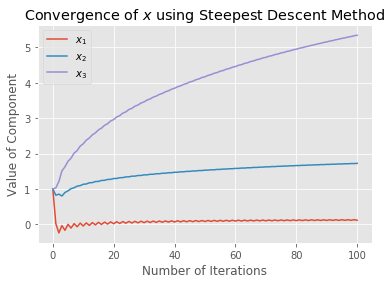

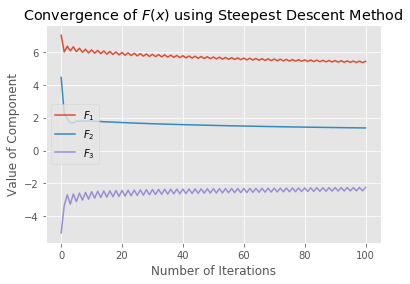

In [278]:
#Steepest Descent Method

yvals_SD = ComputeF(xvals_SD,N_SD)

plt.plot(SD_vals,xvals_SD[:,0],label="$x_{1}$")
plt.plot(SD_vals,xvals_SD[:,1],label="$x_{2}$")
plt.plot(SD_vals,xvals_SD[:,2],label="$x_{3}$")

plt.title("Convergence of $x$ using Steepest Descent Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Component")

plt.legend()
plt.show()

plt.plot(SD_vals,yvals_SD[:,0],label="$F_{1}$")
plt.plot(SD_vals,yvals_SD[:,1],label="$F_{2}$")
plt.plot(SD_vals,yvals_SD[:,2],label="$F_{3}$")

plt.title("Convergence of $F(x)$ using Steepest Descent Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Component")

plt.legend()
plt.show()

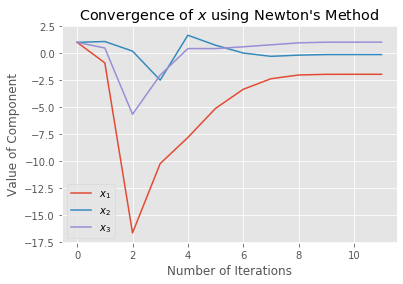

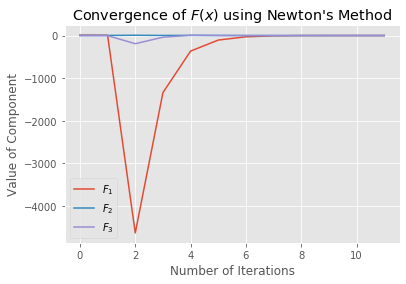

In [279]:
#Newton's Method

yvals_NM = ComputeF(xvals_NM,N_NM)

plt.plot(NM_vals,xvals_NM[:,0],label="$x_{1}$")
plt.plot(NM_vals,xvals_NM[:,1],label="$x_{2}$")
plt.plot(NM_vals,xvals_NM[:,2],label="$x_{3}$")

plt.title("Convergence of $x$ using Newton's Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Component")

plt.legend()
plt.show()

plt.plot(NM_vals,yvals_NM[:,0],label="$F_{1}$")
plt.plot(NM_vals,yvals_NM[:,1],label="$F_{2}$")
plt.plot(NM_vals,yvals_NM[:,2],label="$F_{3}$")

plt.title("Convergence of $F(x)$ using Newton's Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Component")

plt.legend()
plt.show()

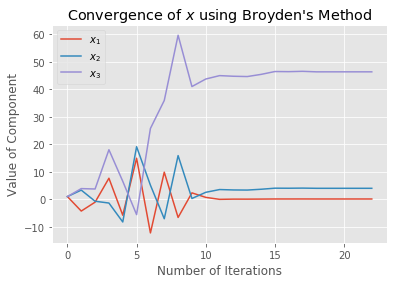

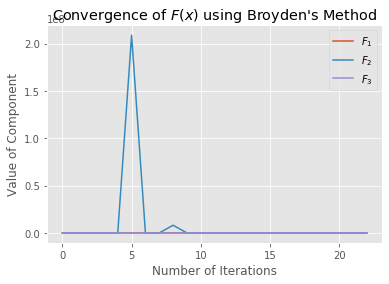

In [260]:
#Broyden's Method

yvals_BM = ComputeF(xvals_BM,N_BM)

plt.plot(BM_vals,xvals_BM[:,0],label="$x_{1}$")
plt.plot(BM_vals,xvals_BM[:,1],label="$x_{2}$")
plt.plot(BM_vals,xvals_BM[:,2],label="$x_{3}$")

plt.title("Convergence of $x$ using Broyden's Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Component")

plt.legend()
plt.show()

plt.plot(BM_vals,yvals_BM[:,0],label="$F_{1}$")
plt.plot(BM_vals,yvals_BM[:,1],label="$F_{2}$")
plt.plot(BM_vals,yvals_BM[:,2],label="$F_{3}$")

plt.title("Convergence of $F(x)$ using Broyden's Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Component")

plt.legend()
plt.show()

**The above plot is somewhat misleading because of the scale of the y-axis. It makes it appear as though the $F(x)$ of the solution found is very close to zero for all components of F(x), which is not the case**.

From the plots we can see that both Newton's and Broyden's Methods converge (using the given tolerance and starting point) to an approximate solution fairly quickly. While both of these methods converge and terminate successfully the solutions are different and not of the same quality.  

A solution to the nonlinear system should be of the form $F(x^{*}) = \vec{0}$, where $x^{*}$ is a solution to the system. We can see that the solution found using Newton's Method is very close to zero in all components of $F(x)$. Comparing this to the solution found using Broyden's Method we see that each component in the solution is not nearly a close to zero as that of the solution found using Newton's Method. In fact, the second component of the Broyden's Method solution is around $10$, which is very far away from zero.  

Using the Steepest Descent Method an approximate solution within the given tolerance was not able to be found within $100$ iterations of the method. This most likely has to do with our choice of starting point. For instance, using a starting of $x^{(0)}=(.1,.1,.1)^{T}$ the method does converge to a solution, as we show below.

In [280]:
x0 = np.array([.1,.1,.1])
x_SD, xvals_SD = SteepestDescent(n,x0,tol,N)
print("\n")
print("The approximate solution to the system of equations is: \n","x = ", x_SD)

The procedure was successful!


The approximate solution to the system of equations is: 
 x =  [-1.71002346 -0.88101335  0.91640323]


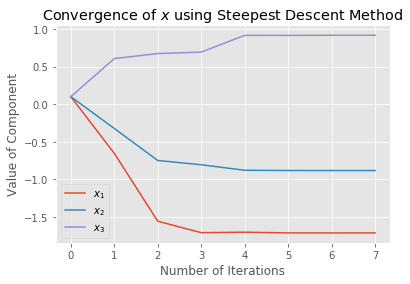

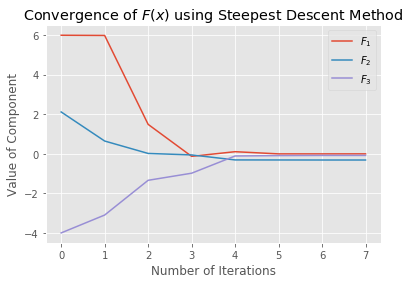

In [281]:
N_SD = np.shape(xvals_SD)[0]
SD_vals = np.arange(N_SD)

yvals_SD = ComputeF(xvals_SD,N_SD)

plt.plot(SD_vals,xvals_SD[:,0],label="$x_{1}$")
plt.plot(SD_vals,xvals_SD[:,1],label="$x_{2}$")
plt.plot(SD_vals,xvals_SD[:,2],label="$x_{3}$")

plt.title("Convergence of $x$ using Steepest Descent Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Component")

plt.legend()
plt.show()

plt.plot(SD_vals,yvals_SD[:,0],label="$F_{1}$")
plt.plot(SD_vals,yvals_SD[:,1],label="$F_{2}$")
plt.plot(SD_vals,yvals_SD[:,2],label="$F_{3}$")

plt.title("Convergence of $F(x)$ using Steepest Descent Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Component")

plt.legend()
plt.show()

## Scratch Work (not for grading)

Testing to make sure my functions work properly using an example from the book.

In [112]:
def f1(x):
    return 3*x[0] - np.cos(x[1]*x[2]) - 0.5
def f2(x):
    return x[0]**2 - 81*((x[1]+.1)**2) + np.sin(x[2]) + 1.06
def f3(x):
    return np.exp(-1*x[0]*x[1]) + 20*x[2] + (((10*np.pi)-3)/3)

def j11(x):
    return 3
def j12(x):
    return x[2]*np.sin(x[1]*x[2])
def j13(x):
    return x[1]*np.sin(x[1]*x[2])
def j21(x):
    return 2*x[0]
def j22(x):
    return -162*(x[1]+.1)
def j23(x):
    return np.cos(x[2])
def j31(x):
    return -1*x[1]*np.exp(-1*x[0]*x[1])
def j32(x):
    return -1*x[0]*np.exp(-1*x[0]*x[1])
def j33(x):
    return 20

f = np.array([f1,f2,f3])
j = np.array([[j11,j12,j13],[j21,j22,j23],[j31,j32,j33]])
x0 = np.array([0,0,0])

n = 3
tol = 1e-5
N = 100

In [113]:
x,xvals = SteepestDescent(n,x0,tol,N)
print(xvals[0:7])

The procedure was successful!
[[ 0.          0.          0.        ]
 [ 0.01121817  0.01009636 -0.52274077]
 [ 0.13785971 -0.20545284 -0.52205942]
 [ 0.26695943  0.00551102 -0.55849445]
 [ 0.27273377 -0.00811751 -0.52200607]
 [ 0.30868928 -0.02040263 -0.53311162]
 [ 0.31430818 -0.01470464 -0.5209234 ]]


In [115]:
x0 = np.array([.1,.1,-.1])
x,xvals = Newton_Method_Systems(n,x0,tol,N)
print(xvals)

The procedure was successful!
[[ 1.00000000e-01  1.00000000e-01 -1.00000000e-01]
 [ 4.99869673e-01  1.94668485e-02 -5.21520472e-01]
 [ 5.00014240e-01  1.58859137e-03 -5.23556964e-01]
 [ 5.00000113e-01  1.24447833e-05 -5.23598450e-01]
 [ 5.00000000e-01  7.75785717e-10 -5.23598776e-01]
 [ 5.00000000e-01  4.28187294e-18 -5.23598776e-01]]


In [116]:
x0 = np.array([.1,.1,-.1])
x,xvals = BroydenMethod(n,x0,tol,N)
print(xvals[3:])

The procedure was successful!
[[ 5.00000329e-01  3.95282753e-05 -5.23597685e-01]
 [ 5.00000002e-01  1.93543975e-07 -5.23598770e-01]
 [ 5.00000000e-01  5.34635353e-13 -5.23598776e-01]]


These results seem to agree well with that of the textbook. These functions *probably* work.